In [6]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [10]:
pd.set_option('display.max_columns',50)

In [3]:
from dotenv import load_dotenv
import os
load_dotenv() 
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")
database = os.getenv("DB_NAME")

In [7]:
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")
query ="select * from ppm;"
df = pd.read_sql(query, engine)

In [ ]:
 df.head()

,Date,Shift,Part_No,Production,Screen_Overlap_F,Dent_F,Poor_Paintwork_F,Screen_Fail_F,Dv_Damage_F,Dv_Wire_Cut_F,Element_Miss_R,Seam_Leak_F,Crimp_Nut_Leak_F,Casting_Leak_R,Bleed_Screw_Leak_R,Adaptor_Leak_R,Dv_Body_Leak_F,Dv_Oring_Leak_F,F_Damage_P,F_Paint_Fail_P,Reed_Fail_P,Head_Sealing_Damage_R,Gauge_Fail_R,Mounting_Adaptor_Fail_R,Heater_Leak_R,Head_Fail_P,F_Gasket_Cut_F,Od_Fail_R,Sealing_Leak_R,Sealing_Fail_P,F_Nutplate_Wrong_F,Nogo_Fail_R,Scratch_On_Sealing_P,Wrong_Filter_F,Wrong_Head_R,Dv_Fitment_Fail_F,Dv_Loose_F,Without_PPI_Inspection_P,Dv_Torque_Marking_Miss_F,Washer_Sealing_Leak_P,Connector_Damage_P,Washer_Sealing_R,Adaptor_Damage_P,Hpp_Pump_Fail_R,F_Scratch_Mark_P
0,2024-07-02,I,8539665,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2024-07-02,I,8059201,300,0,1,131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2024-07-02,I,8185559,90,0,6,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2024-07-02,I,8567029,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2024-07-02,I,5046557,90,0,0,56,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

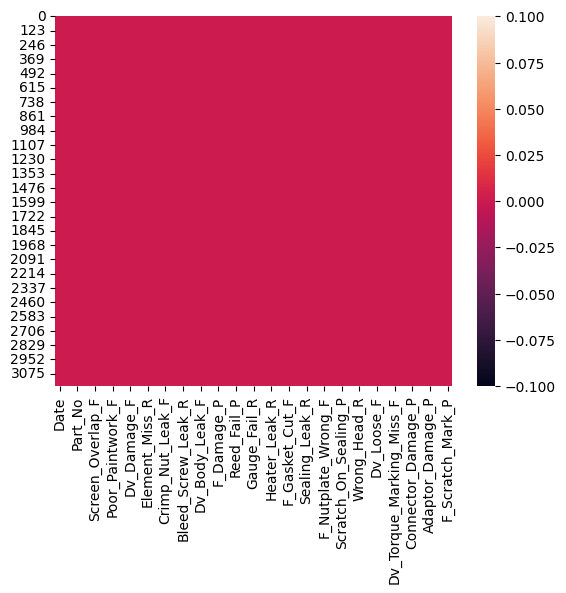

In [12]:
sn.heatmap(df.isnull())

In [31]:
prod_df = df.iloc[:,0:4]

In [ ]:
prod_df['Month'] = prod_df['Date'].dt.month

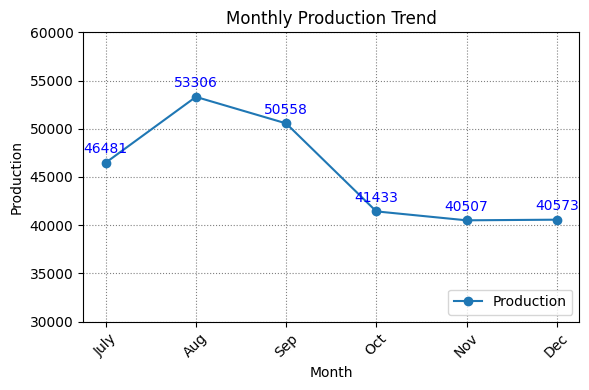

In [60]:
# Grouping and plotting
monthly_prod = prod_df.groupby(['Month'])['Production'].sum()
xlabels = ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Use object-oriented interface
fig, ax = plt.subplots(figsize=(6, 4) )

# Plot the line
ax.plot(monthly_prod.index, monthly_prod.values, marker='o', label='Production')

# Axis settings
ax.set_xticks(monthly_prod.index)
ax.set_xticklabels(xlabels, rotation=45)
ax.set_ylim(30000, 60000)
ax.set_title("Monthly Production Trend")
ax.set_xlabel("Month")
ax.set_ylabel("Production")
ax.grid(color='grey', linestyle=':')
ax.legend(loc='lower right')

# Add value labels on data points
for i in range(len(monthly_prod)):
    ax.text(monthly_prod.index[i],
            monthly_prod.values[i] + 700,  # slightly above point
            str(monthly_prod.values[i]),
            ha='center',
            va='bottom',
            fontsize=10,
            color='blue')

plt.tight_layout()
plt.show()


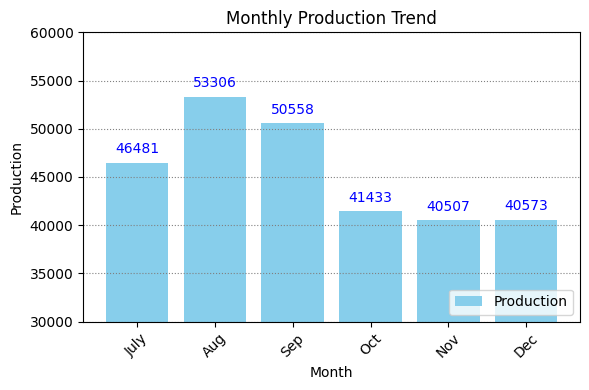

In [61]:
# Grouping and plotting
monthly_prod = prod_df.groupby(['Month'])['Production'].sum()
xlabels = ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Use object-oriented interface
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the bar chart instead of line
ax.bar(monthly_prod.index, monthly_prod.values, label='Production', color='skyblue')

# Axis settings
ax.set_xticks(monthly_prod.index)
ax.set_xticklabels(xlabels, rotation=45)
ax.set_ylim(30000, 60000)
ax.set_title("Monthly Production Trend")
ax.set_xlabel("Month")
ax.set_ylabel("Production")
ax.grid(color='grey', linestyle=':', axis='y')
ax.legend(loc='lower right')

# Add value labels on top of each bar
for i in range(len(monthly_prod)):
    ax.text(monthly_prod.index[i],
            monthly_prod.values[i] + 700,  # slightly above bar
            str(monthly_prod.values[i]),
            ha='center',
            va='bottom',
            fontsize=10,
            color='blue')

plt.tight_layout()
plt.show()


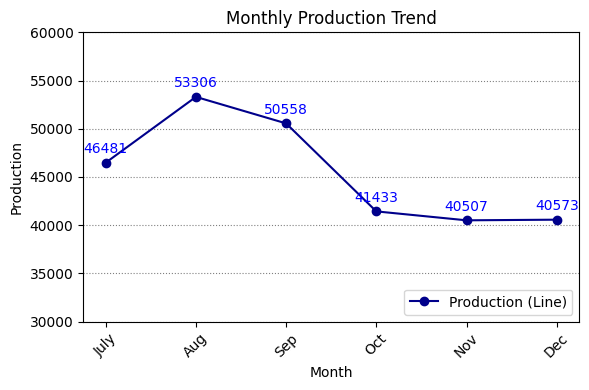

In [ ]:
# Grouping and plotting
monthly_prod = prod_df.groupby(['Month'])['Production'].sum()
xlabels = ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots(figsize=(6, 4))

# Plot bar chart
ax.bar(monthly_prod.index, monthly_prod.values, label='Production (Bar)', color='skyblue', alpha=0.7)

# Plot line chart on top
ax.plot(monthly_prod.index, monthly_prod.values, marker='o', color='darkblue', label='Production (Line)')

# Axis settings
ax.set_xticks(monthly_prod.index)
ax.set_xticklabels(xlabels, rotation=45)
ax.set_ylim(30000, 60000)
ax.set_title("Monthly Production Trend")
ax.set_xlabel("Month")
ax.set_ylabel("Production")
ax.grid(color='grey', linestyle=':', axis='y')
ax.legend(loc='lower right')

# Add value labels (you can do for either or both)
for i in range(len(monthly_prod)):
    ax.text(monthly_prod.index[i],
            monthly_prod.values[i] + 700,
            str(monthly_prod.values[i]),
            ha='center',
            va='bottom',
            fontsize=10,
            color='blue')

plt.tight_layout()
plt.show()


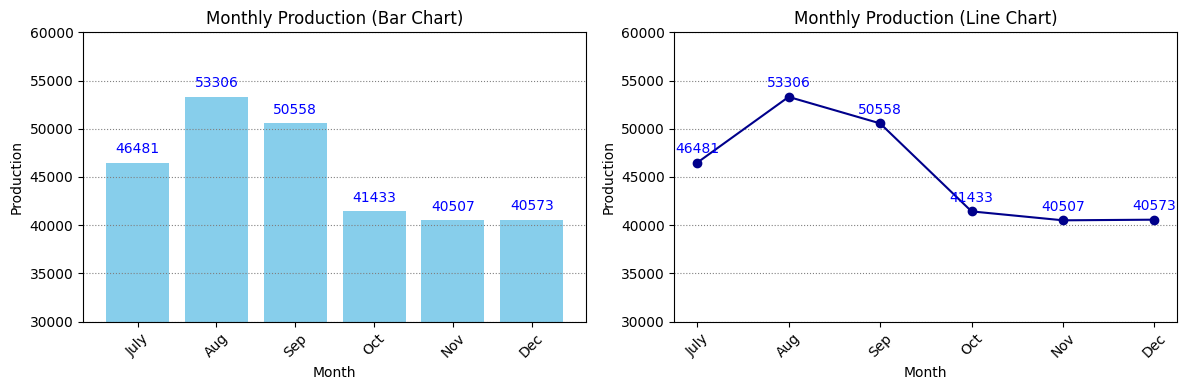

In [63]:
monthly_prod = prod_df.groupby(['Month'])['Production'].sum()
xlabels = ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Bar chart on the first subplot
ax1.bar(monthly_prod.index, monthly_prod.values, color='skyblue')
ax1.set_xticks(monthly_prod.index)
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_ylim(30000, 60000)
ax1.set_title("Monthly Production (Bar Chart)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Production")
ax1.grid(color='grey', linestyle=':', axis='y')

# Add value labels on bars
for i in range(len(monthly_prod)):
    ax1.text(monthly_prod.index[i], monthly_prod.values[i] + 700, str(monthly_prod.values[i]), 
             ha='center', va='bottom', fontsize=10, color='blue')

# Line chart on the second subplot
ax2.plot(monthly_prod.index, monthly_prod.values, marker='o', color='darkblue')
ax2.set_xticks(monthly_prod.index)
ax2.set_xticklabels(xlabels, rotation=45)
ax2.set_ylim(30000, 60000)
ax2.set_title("Monthly Production (Line Chart)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Production")
ax2.grid(color='grey', linestyle=':', axis='y')

# Add value labels on points
for i in range(len(monthly_prod)):
    ax2.text(monthly_prod.index[i], monthly_prod.values[i] + 700, str(monthly_prod.values[i]),
             ha='center', va='bottom', fontsize=10, color='blue')

plt.tight_layout()
plt.show()


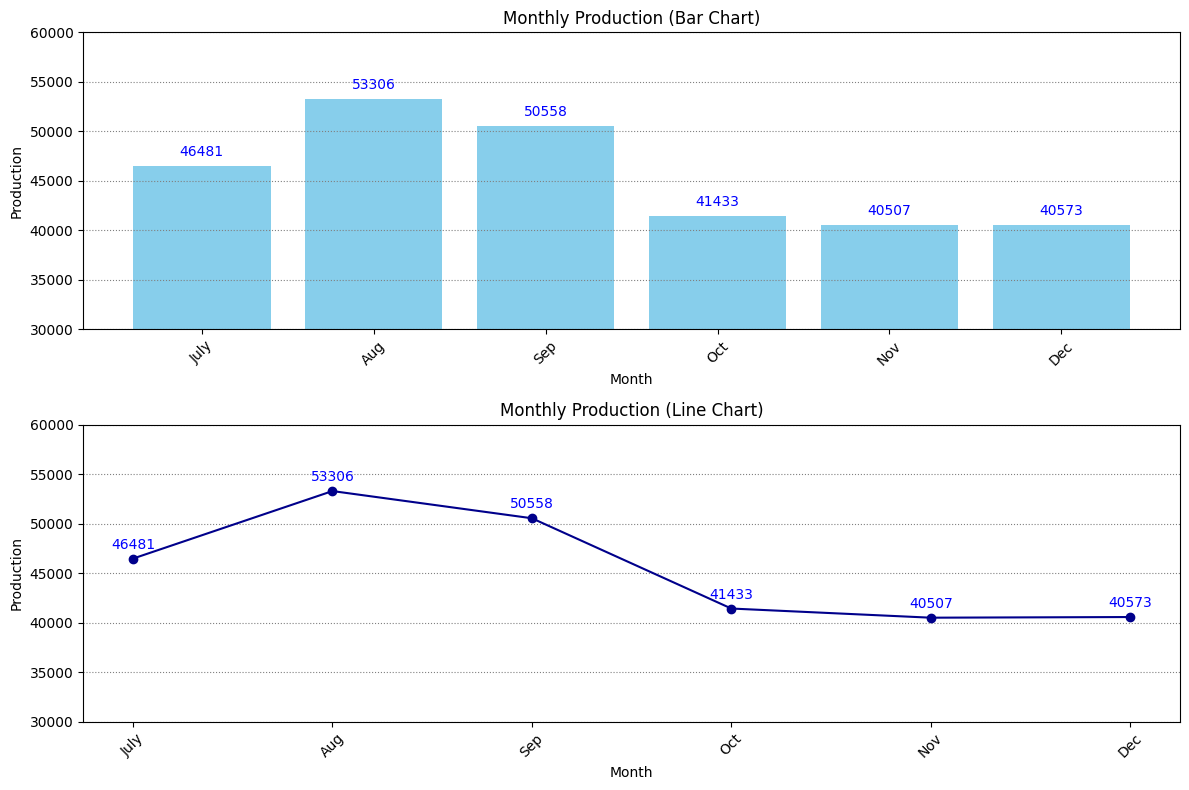

In [65]:
monthly_prod = prod_df.groupby(['Month'])['Production'].sum()
xlabels = ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))  # 1 row, 2 columns

# Bar chart on the first subplot
ax1.bar(monthly_prod.index, monthly_prod.values, color='skyblue')
ax1.set_xticks(monthly_prod.index)
ax1.set_xticklabels(xlabels, rotation=45)
ax1.set_ylim(30000, 60000)
ax1.set_title("Monthly Production (Bar Chart)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Production")
ax1.grid(color='grey', linestyle=':', axis='y')

# Add value labels on bars
for i in range(len(monthly_prod)):
    ax1.text(monthly_prod.index[i], monthly_prod.values[i] + 700, str(monthly_prod.values[i]), 
             ha='center', va='bottom', fontsize=10, color='blue')

# Line chart on the second subplot
ax2.plot(monthly_prod.index, monthly_prod.values, marker='o', color='darkblue')
ax2.set_xticks(monthly_prod.index)
ax2.set_xticklabels(xlabels, rotation=45)
ax2.set_ylim(30000, 60000)
ax2.set_title("Monthly Production (Line Chart)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Production")
ax2.grid(color='grey', linestyle=':', axis='y')

# Add value labels on points
for i in range(len(monthly_prod)):
    ax2.text(monthly_prod.index[i], monthly_prod.values[i] + 700, str(monthly_prod.values[i]),
             ha='center', va='bottom', fontsize=10, color='blue')

plt.tight_layout()
plt.show()


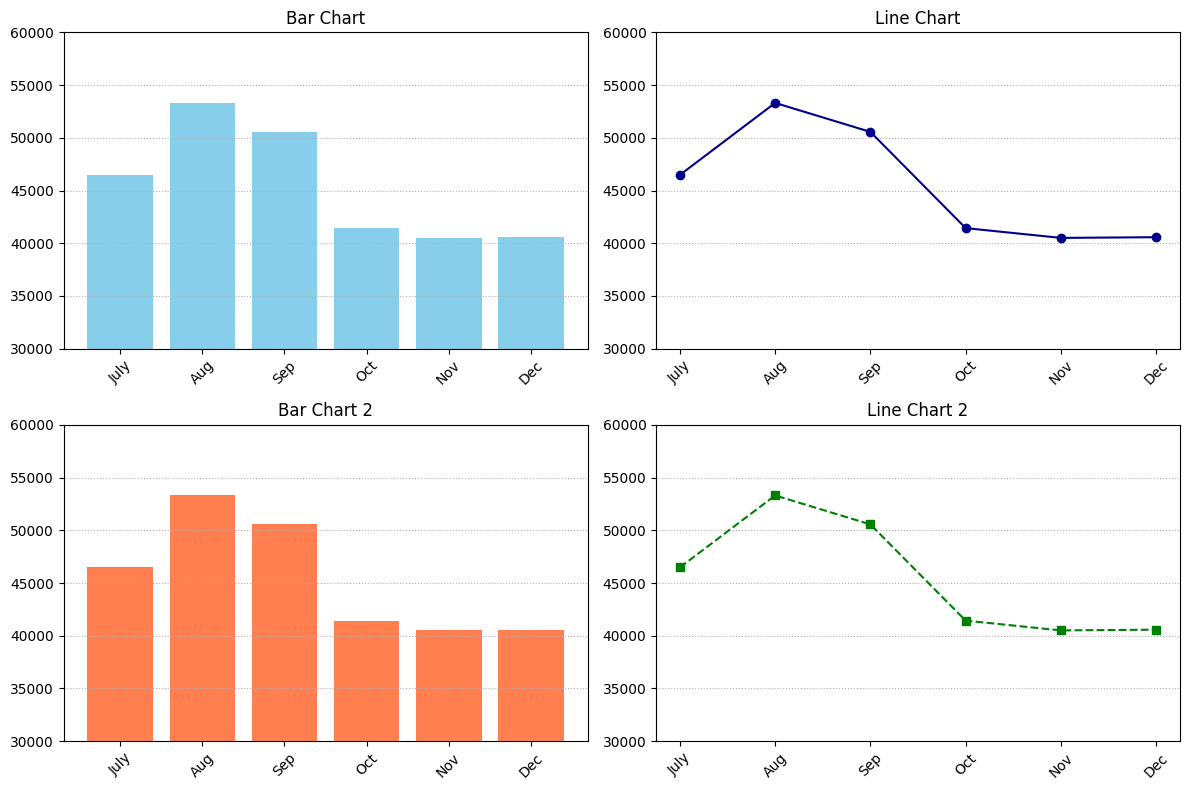

In [66]:
monthly_prod = prod_df.groupby(['Month'])['Production'].sum()
xlabels = ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Flatten axs for easy indexing
axs = axs.flatten()

# Plot 1: Bar chart
axs[0].bar(monthly_prod.index, monthly_prod.values, color='skyblue')
axs[0].set_xticks(monthly_prod.index)
axs[0].set_xticklabels(xlabels, rotation=45)
axs[0].set_title("Bar Chart")
axs[0].set_ylim(30000, 60000)
axs[0].grid(axis='y', linestyle=':')

# Plot 2: Line chart
axs[1].plot(monthly_prod.index, monthly_prod.values, marker='o', color='darkblue')
axs[1].set_xticks(monthly_prod.index)
axs[1].set_xticklabels(xlabels, rotation=45)
axs[1].set_title("Line Chart")
axs[1].set_ylim(30000, 60000)
axs[1].grid(axis='y', linestyle=':')

# Plot 3: Another bar chart with different color
axs[2].bar(monthly_prod.index, monthly_prod.values, color='coral')
axs[2].set_xticks(monthly_prod.index)
axs[2].set_xticklabels(xlabels, rotation=45)
axs[2].set_title("Bar Chart 2")
axs[2].set_ylim(30000, 60000)
axs[2].grid(axis='y', linestyle=':')

# Plot 4: Another line chart with dashed line
axs[3].plot(monthly_prod.index, monthly_prod.values, marker='s', linestyle='--', color='green')
axs[3].set_xticks(monthly_prod.index)
axs[3].set_xticklabels(xlabels, rotation=45)
axs[3].set_title("Line Chart 2")
axs[3].set_ylim(30000, 60000)
axs[3].grid(axis='y', linestyle=':')

# Add a tight layout to avoid overlap
plt.tight_layout()
plt.show()


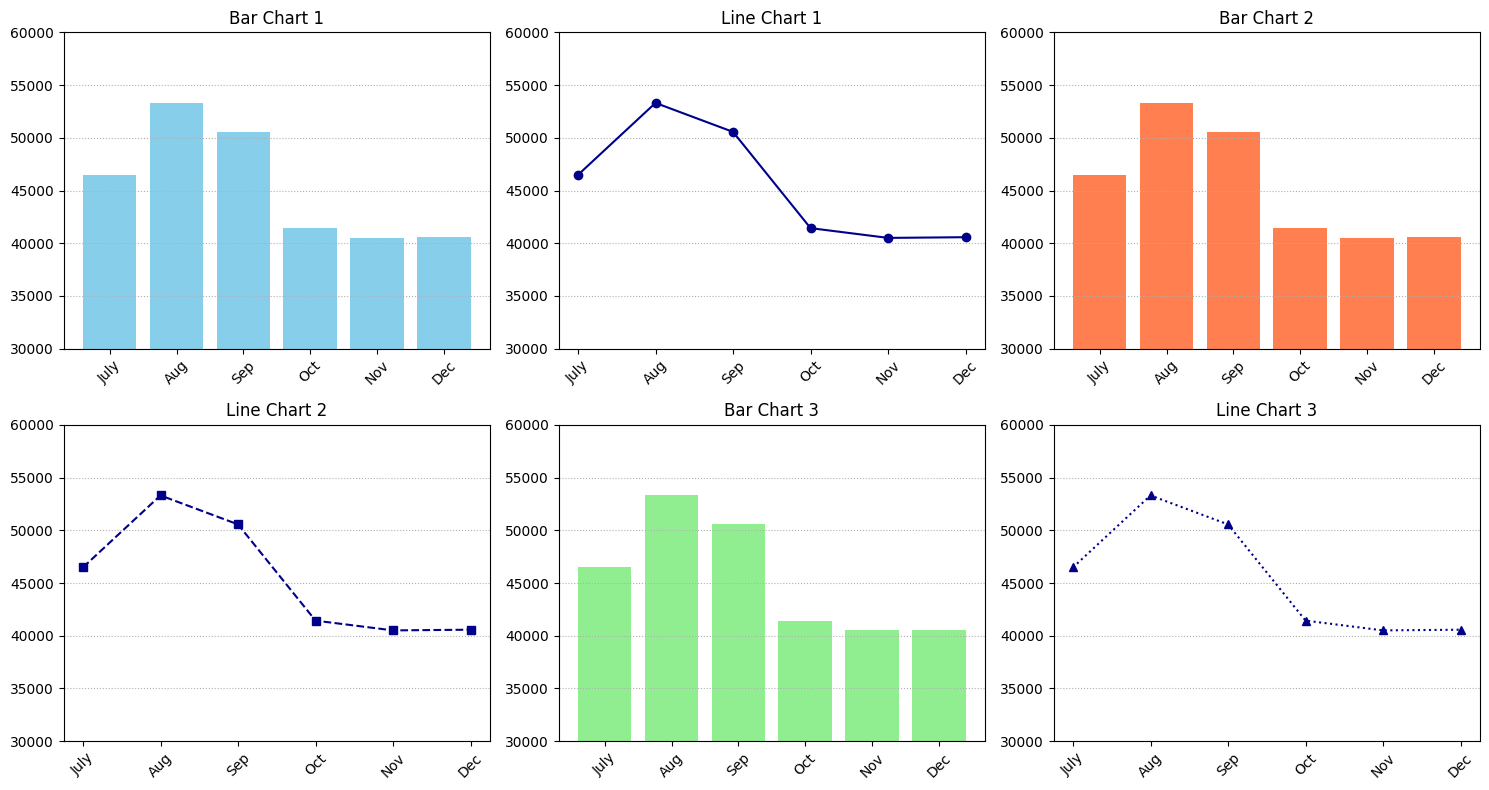

In [70]:
monthly_prod = prod_df.groupby(['Month'])['Production'].sum()
xlabels = ['July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns
axs = axs.flatten()  # Flatten to easily iterate

for i in range(6):
    if i % 2 == 0:
        # Even index: bar chart with different colors
        color = ['skyblue', 'coral', 'lightgreen'][i//2 % 3]
        axs[i].bar(monthly_prod.index, monthly_prod.values, color=color)
        axs[i].set_title(f"Bar Chart {i//2 + 1}")
    else:
        # Odd index: line chart with different markers and styles
        markers = ['o', 's', '^']
        linestyles = ['-', '--', ':']
        axs[i].plot(monthly_prod.index, monthly_prod.values, marker=markers[i//2], linestyle=linestyles[i//2], color='darkblue')
        axs[i].set_title(f"Line Chart {i//2 + 1}")

    axs[i].set_xticks(monthly_prod.index)
    axs[i].set_xticklabels(xlabels, rotation=45)
    axs[i].set_ylim(30000, 60000)
    axs[i].grid(axis='y', linestyle=':')

plt.tight_layout()
plt.show()
